# ENCS5341 : MACHINE LEARNING AND DATA SCIENCE
<h4>Assignment 3: <br> KNN, Logistic Regression, SVM, Kernel Methods, and Ensemble Methods (Boosting and Bagging) </h4>

<h4> <b>Mohammed Abed Alkareem - 1210708</b> </h4>

#### **Karim Adel Marayta - 1211610**

https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html


The breast cancer dataset is a classic and binary classification dataset.

<div class="pst-scrollable-table-container"><table class="table">
<tbody>
<tr class="row-odd"><td><p>Classes</p></td>
<td><p>2</p></td>
</tr>
<tr class="row-even"><td><p>Samples per class</p></td>
<td><p>212(M),357(B)</p></td>
</tr>
<tr class="row-odd"><td><p>Samples total</p></td>
<td><p>569</p></td>
</tr>
<tr class="row-even"><td><p>Dimensionality</p></td>
<td><p>30</p></td>
</tr>
<tr class="row-odd"><td><p>Features</p></td>
<td><p>real, positive</p></td>
</tr>
</tbody>
</table>
</div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import os
from sklearn.preprocessing import StandardScaler

## 1. Data Preprocessing

In [2]:
cancer_data = load_breast_cancer(as_frame=True)

cancer_features = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_labels = pd.Series(cancer_data.target)

In [3]:
cancer_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
cancer_labels

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
cancer_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
cancer_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
cancer_features.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

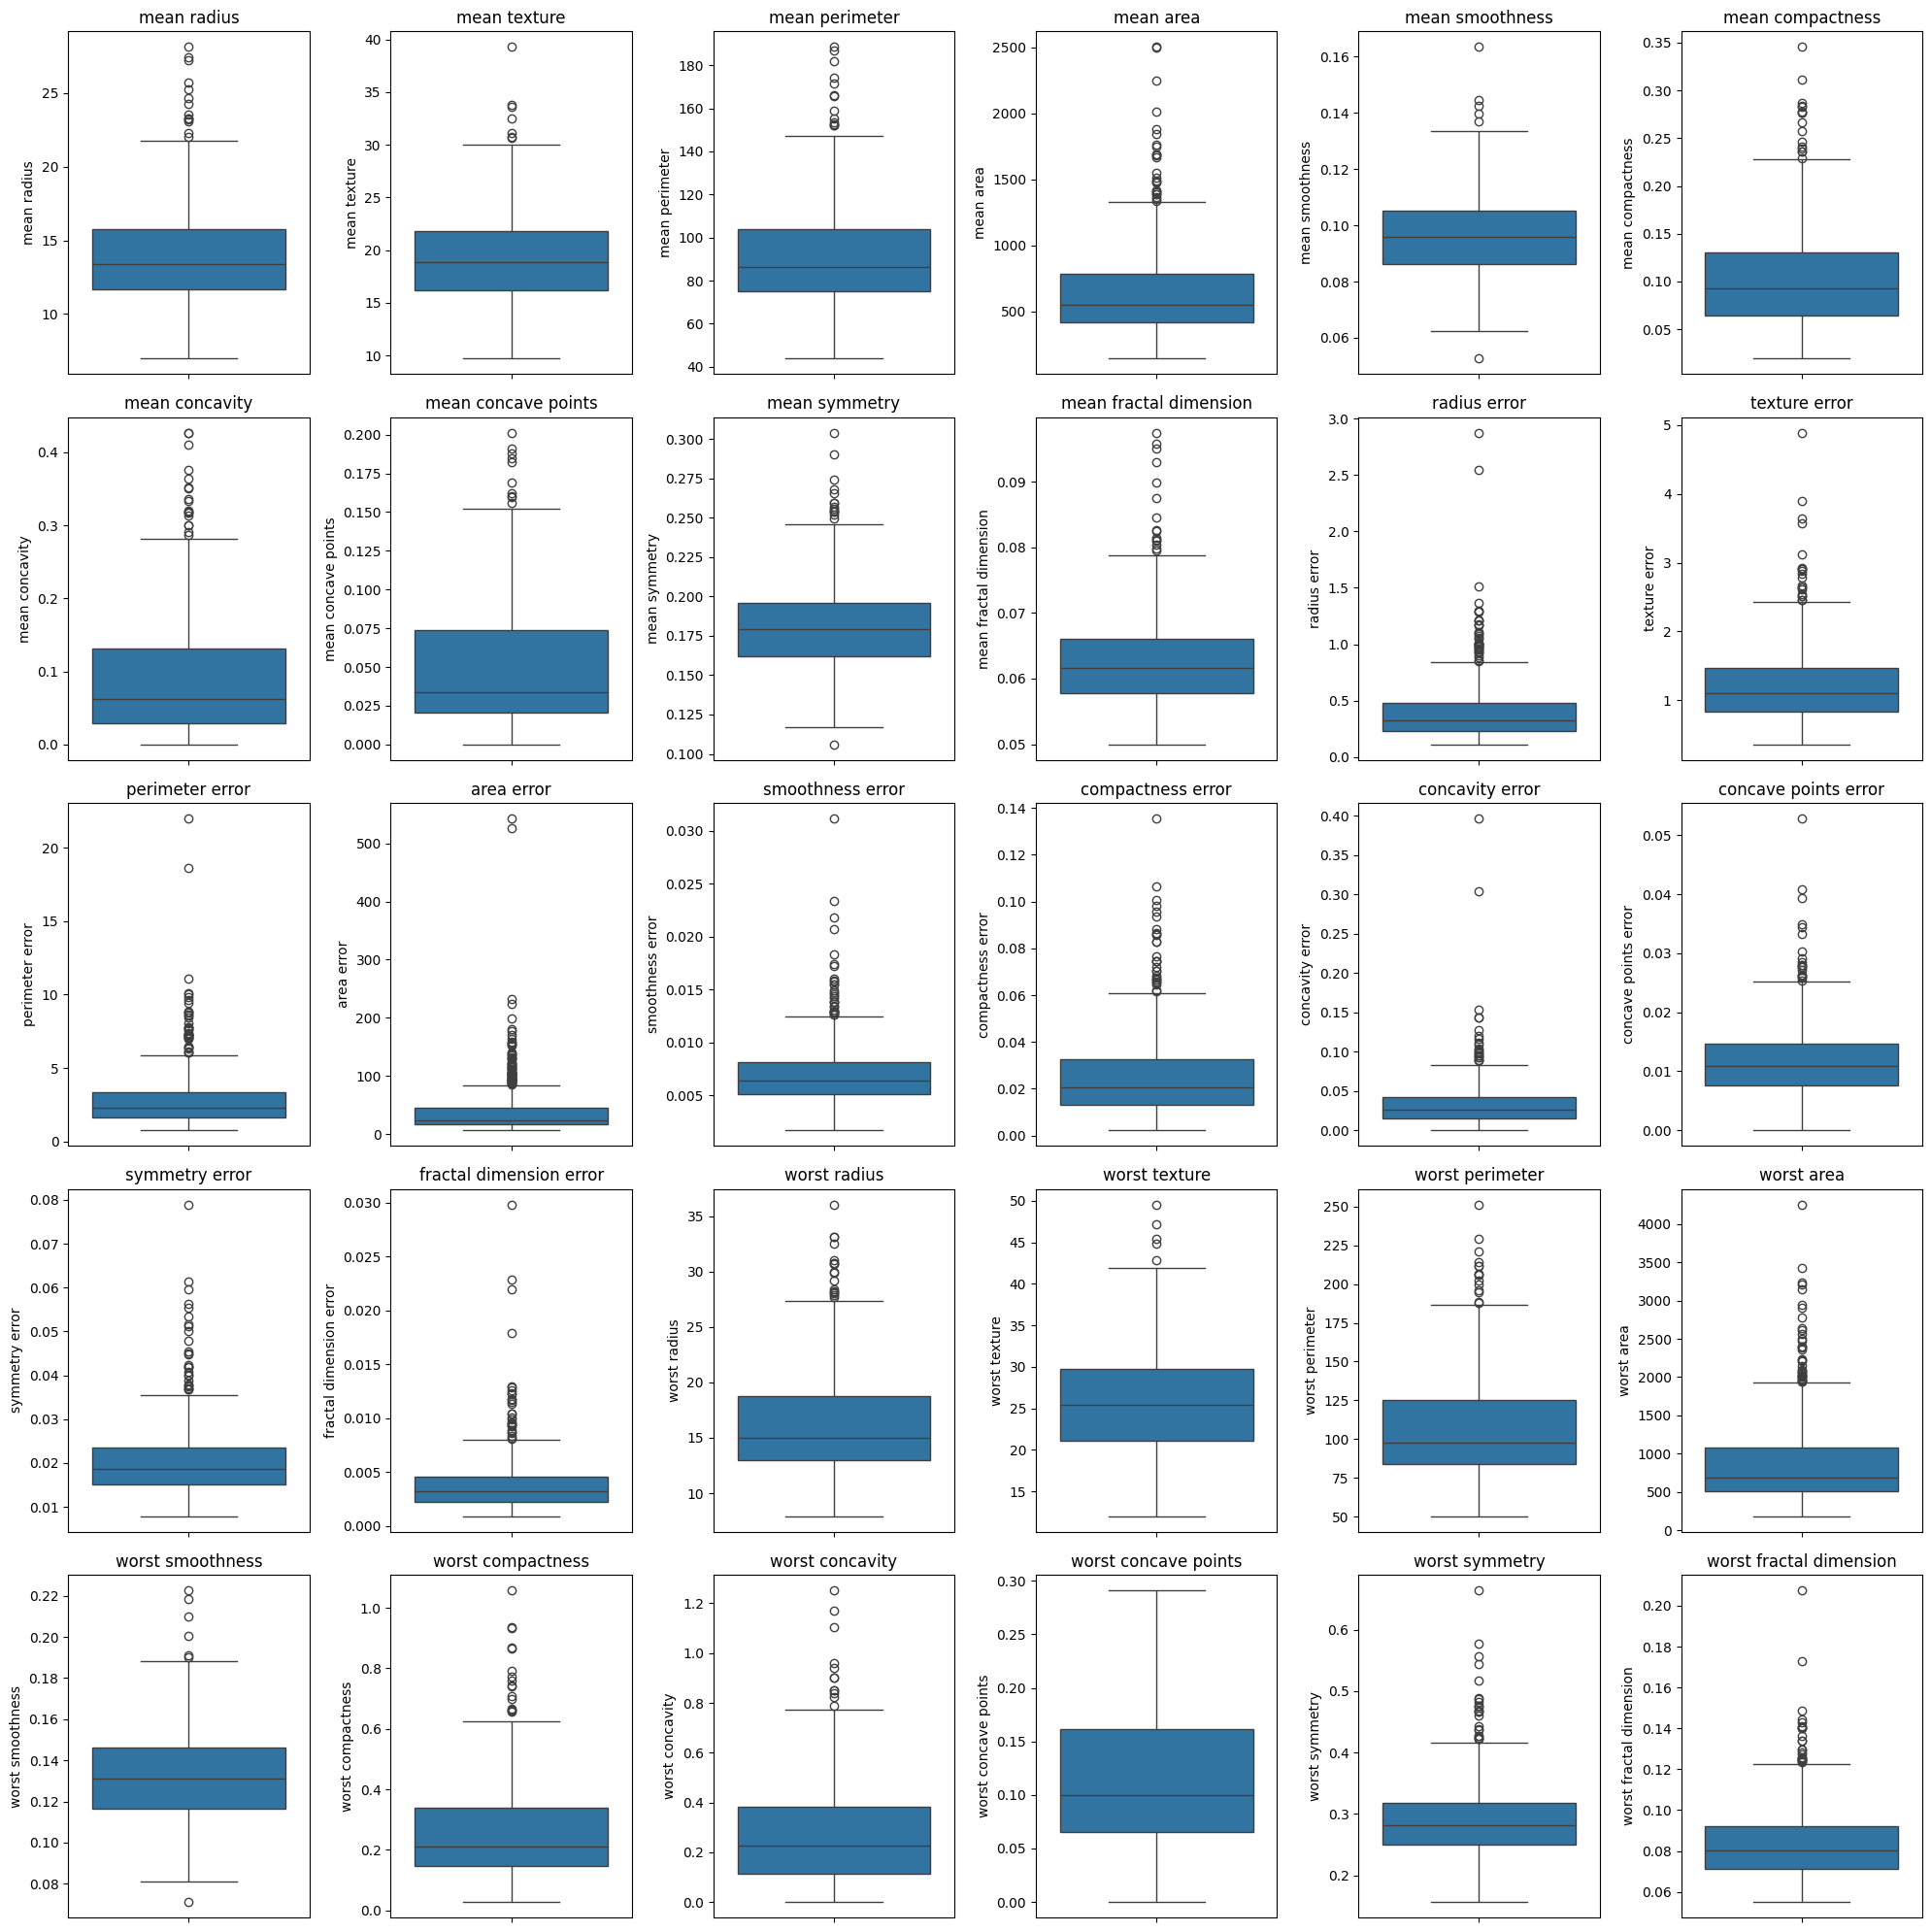

In [8]:
#draw boxplot for each feature a grid of 5x6
plt.figure(figsize=(20,20))
for i, feature in enumerate(cancer_features.columns):
    plt.subplot(5,6,i+1)
    sns.boxplot(y=cancer_features[feature])
    plt.title(feature)
    # add more space between the plots
    plt.tight_layout()
plt.show()



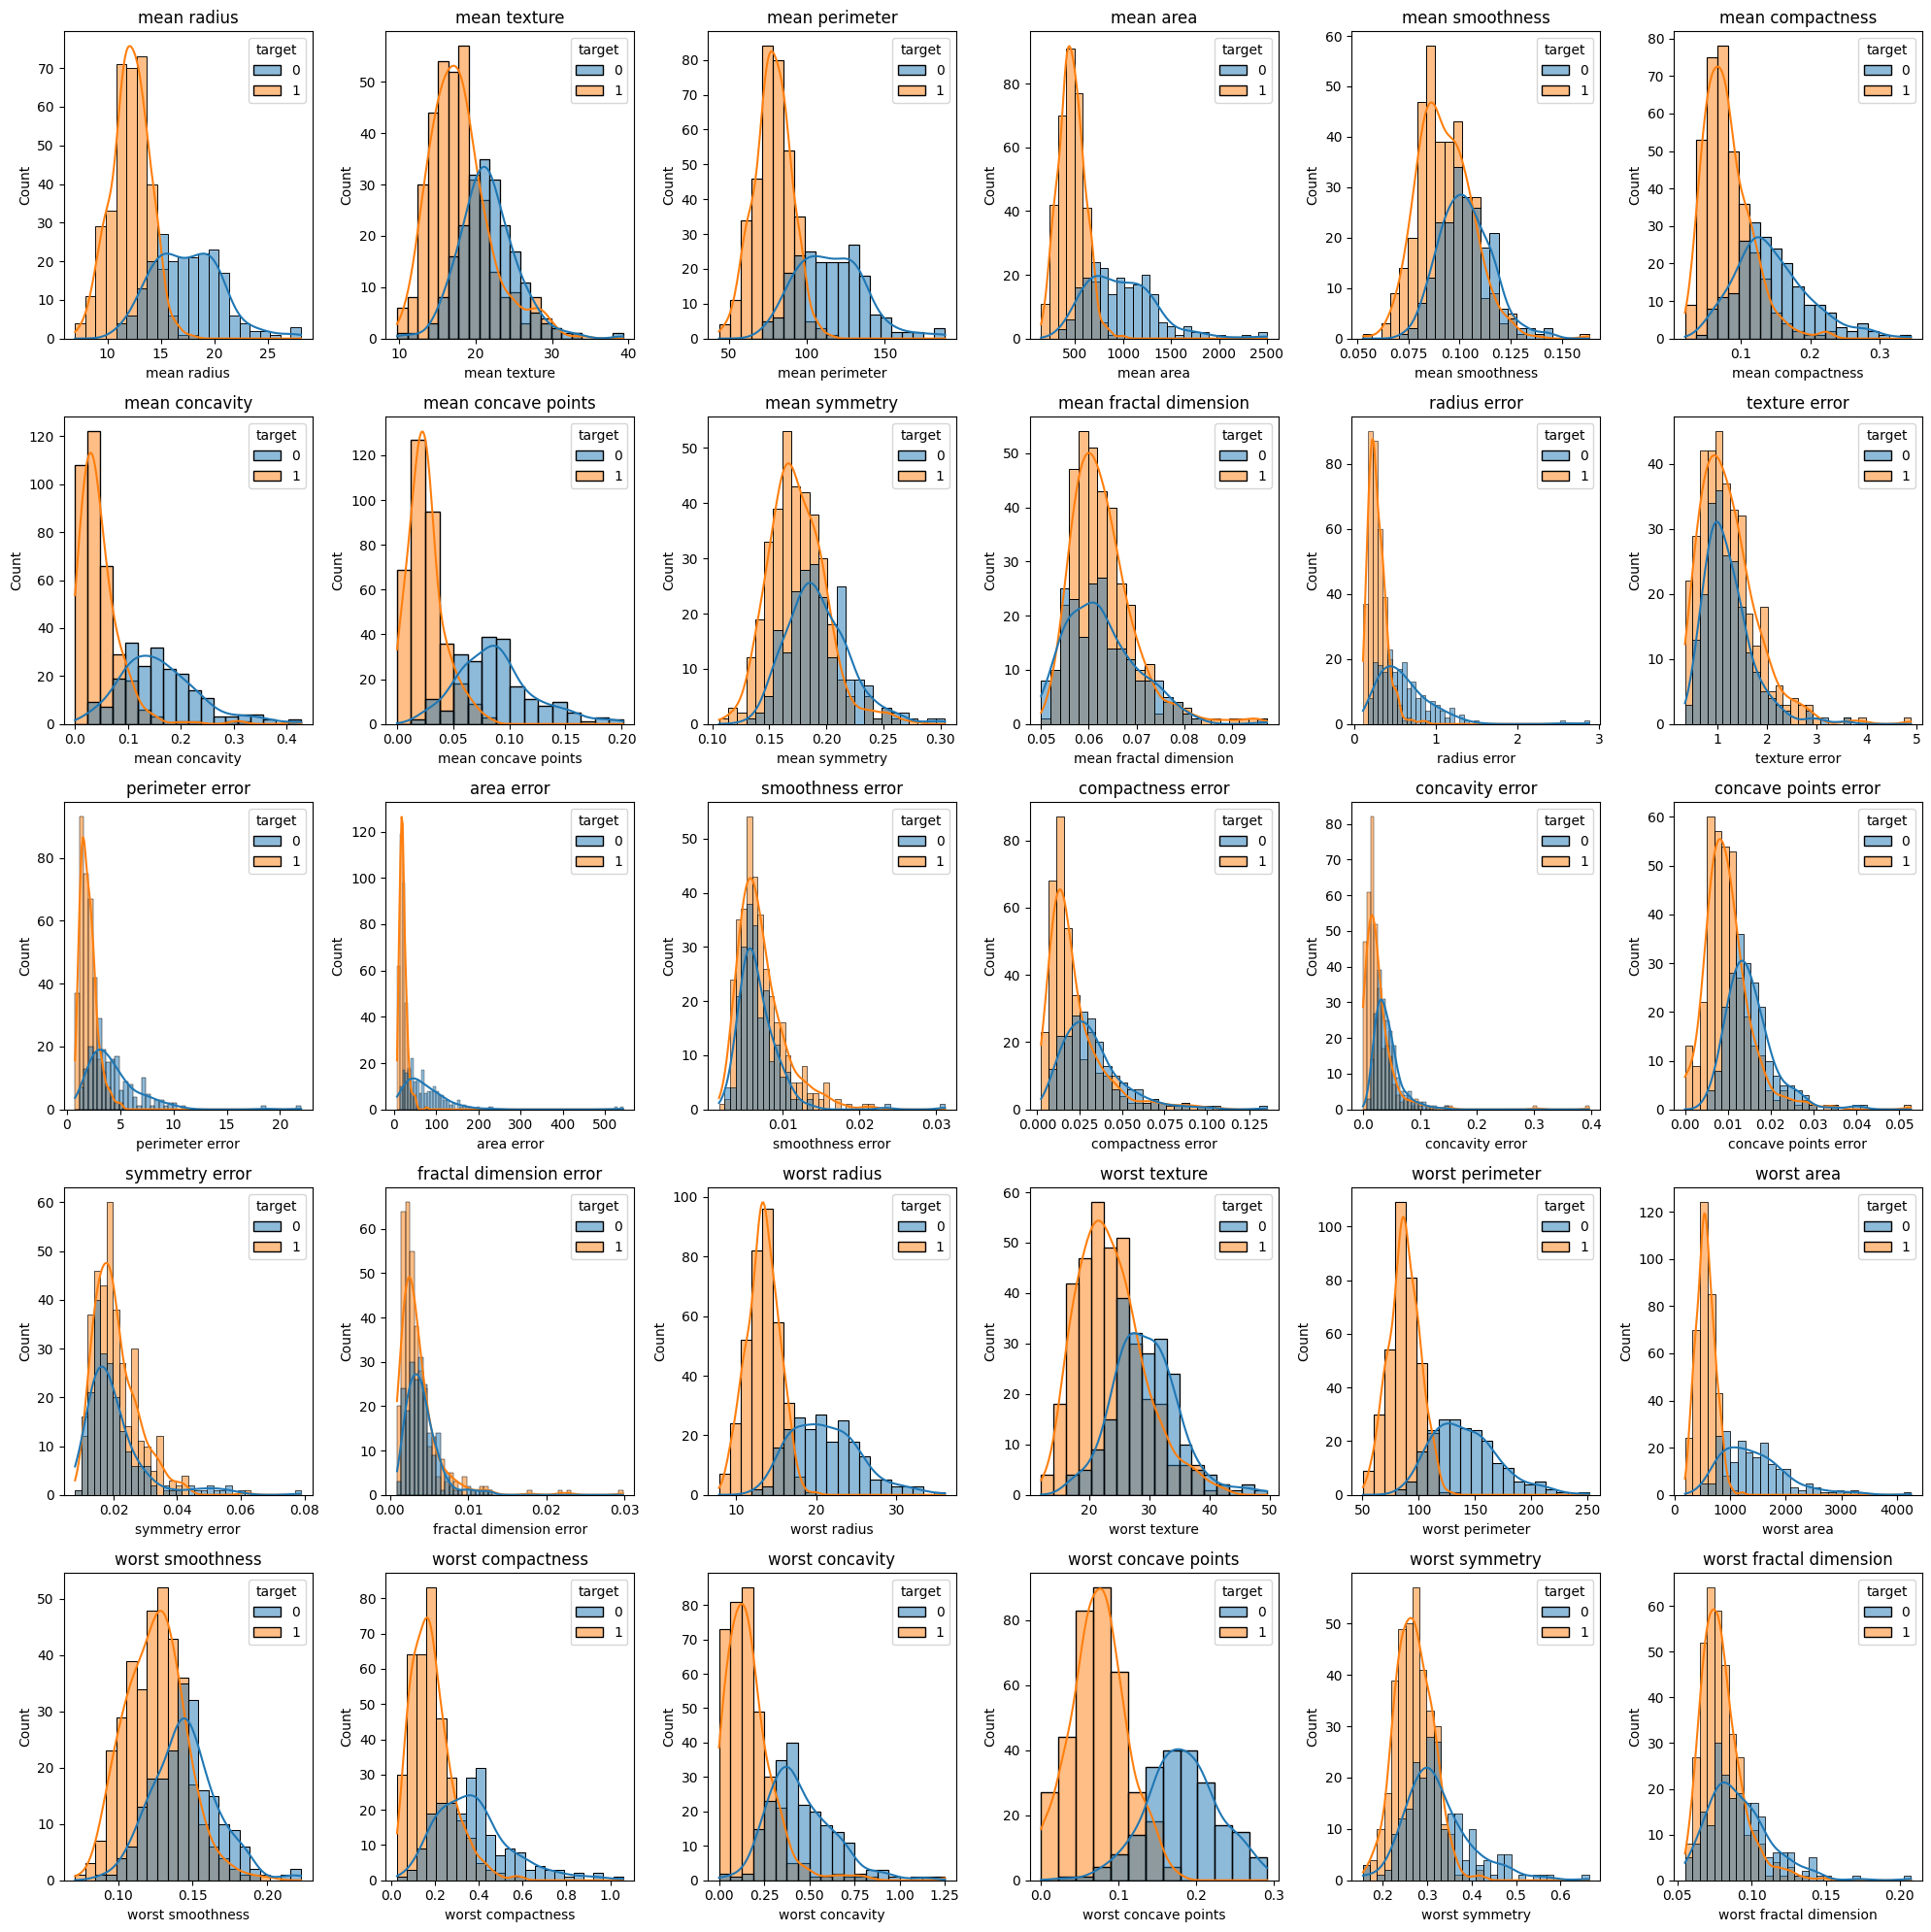

In [9]:
#draw a histogram for each feature a grid of 5x6 for each class
plt.figure(figsize=(20,20))
for i, feature in enumerate(cancer_features.columns):
    plt.subplot(5,6,i+1)
    sns.histplot(data=cancer_features, x=feature, hue=cancer_labels, kde=True)
    plt.title(feature)
    # add more space between the plots
    plt.tight_layout()
plt.show()


In [10]:
# Scale the features
scaler = StandardScaler()
cancer_features = scaler.fit_transform(cancer_features)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer_features, cancer_labels, test_size=0.25, random_state=42)

## 2. Classification Models

### 2.1 K-Nearest Neighbors (KNN)

In [12]:

distances = ['euclidean', 'manhattan', 'cosine', 'minkowski']
param_grid = {'metric': distances}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine',
                                    'minkowski']},
             scoring='accuracy')

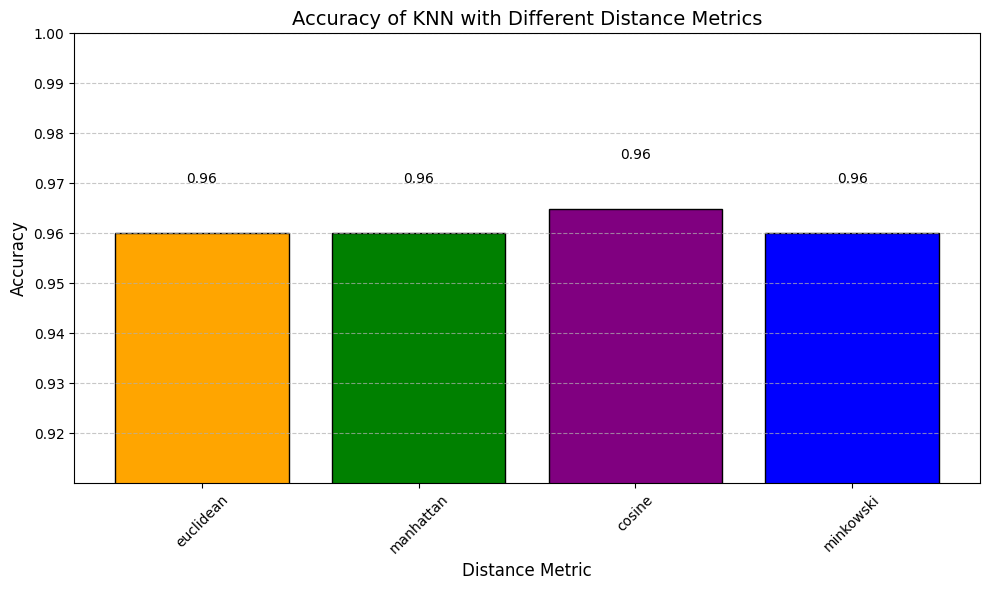

In [13]:
accuracies = grid_search.cv_results_['mean_test_score']

min_accuracy = min(accuracies)
max_accuracy = max(accuracies)

colors = ['orange', 'green', 'purple', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(distances, accuracies, color=colors, edgecolor='black')
plt.ylim(min_accuracy - 0.05, 1)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Distance Metric', fontsize=12)
plt.title('Accuracy of KNN with Different Distance Metrics', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', fontsize=10)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [14]:

K_values = [1, 3, 5, 7, 9, 15]


param_grid = {'n_neighbors': K_values}
knn = KNeighborsClassifier(metric='cosine')
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='cosine'),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15]},
             scoring='accuracy')

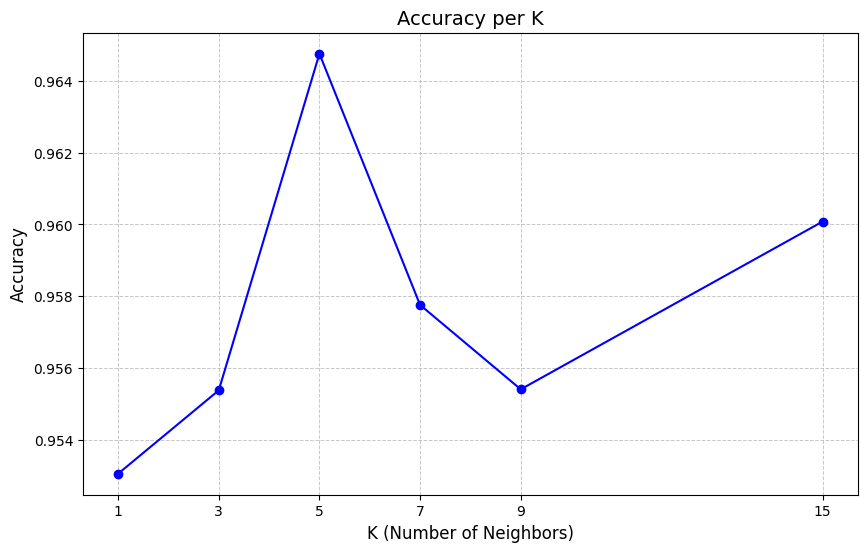

In [15]:

# Plot the line
plt.figure(figsize=(10, 6))
plt.plot(K_values, grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='blue', label='Mean Test Accuracy')  # Added markers and label
plt.xlabel('K (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy per K', fontsize=14)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)  # Improved gridlines
plt.xticks(K_values, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
distances = ['euclidean', 'manhattan', 'cosine', 'minkowski']
K_values = [1, 3, 5, 7, 9, 15]
param_grid = {'metric': distances, 'n_neighbors': K_values}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine',
                                    'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 15]},
             scoring='accuracy')

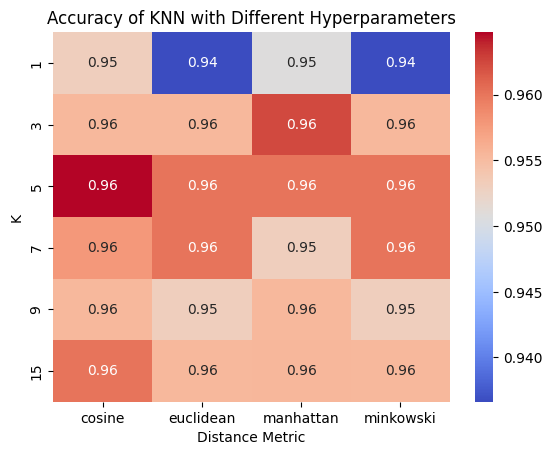

In [17]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.pivot(index='param_n_neighbors', columns='param_metric', values='mean_test_score')
sns.heatmap(results, annot=True, cmap='coolwarm')
plt.xlabel('Distance Metric')
plt.ylabel('K')
plt.title('Accuracy of KNN with Different Hyperparameters')
plt.show()


              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.98      0.96      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



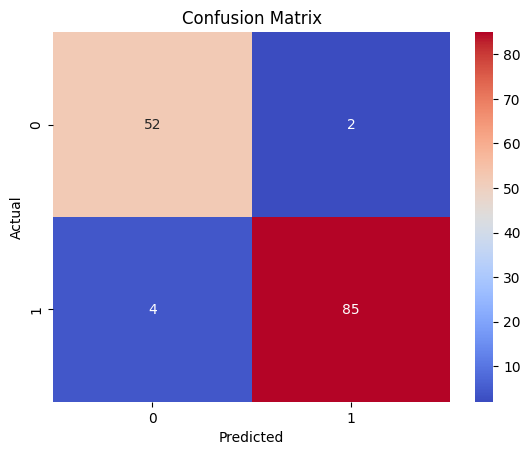

In [18]:
#train with the best parameters
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train, y_train)

# test on the test set
y_pred = knn.predict(X_test)

#get full report
print(classification_report(y_test, y_pred))
# confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

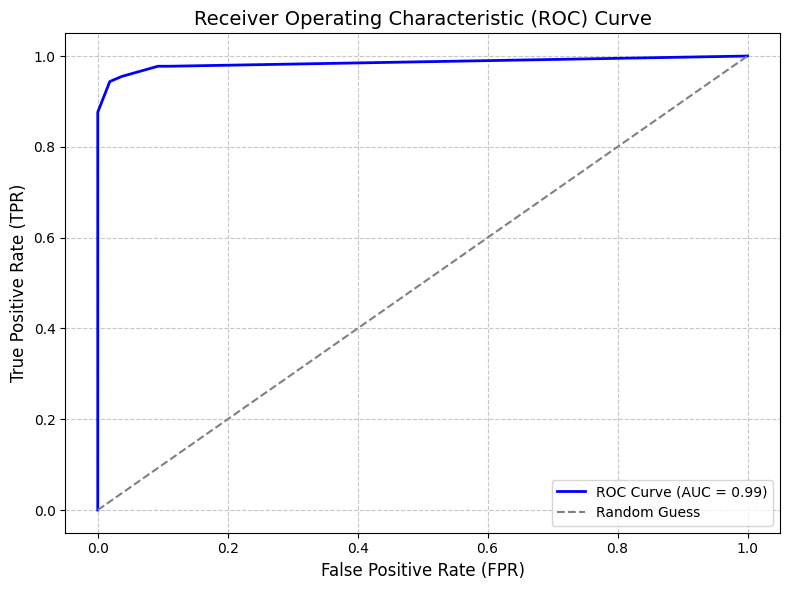

AUC: 0.9851227632126508


In [19]:
# Generate ROC Curve 

y_probs = knn.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# AUC score
print(f'AUC: {auc_score}')


### 2.2 Logistic Regression

In [20]:

# Logistic Regression

# Logistic Regression

penalties = ['l1', 'l2']
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = {'penalty': penalties, 'C': c_values}

log_reg = LogisticRegression(max_iter=10000, solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

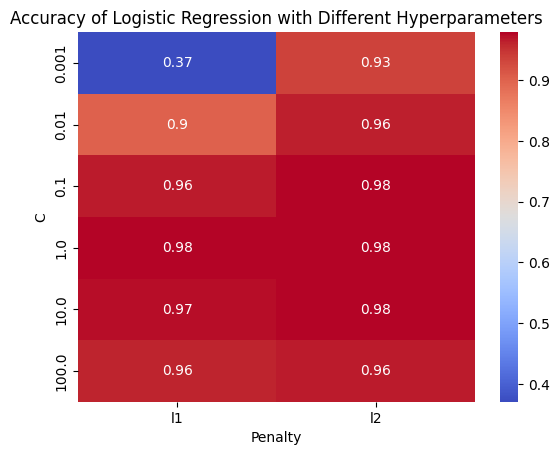

In [21]:
#plot the results
results = pd.DataFrame(grid_search.cv_results_)

results = results.pivot(index='param_C', columns='param_penalty', values='mean_test_score')
sns.heatmap(results, annot=True, cmap='coolwarm')
plt.xlabel('Penalty')
plt.ylabel('C')
plt.title('Accuracy of Logistic Regression with Different Hyperparameters')
plt.show()




In [22]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



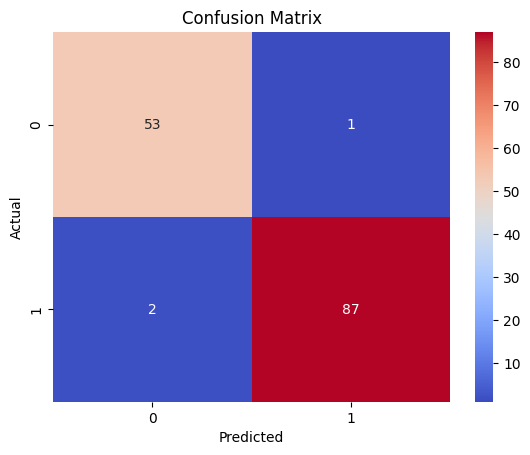

In [23]:
# Train with the best parameters
log_reg = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l2', C=1)
log_reg.fit(X_train, y_train)

# Test on the test set
y_pred = log_reg.predict(X_test)

# Get full report
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



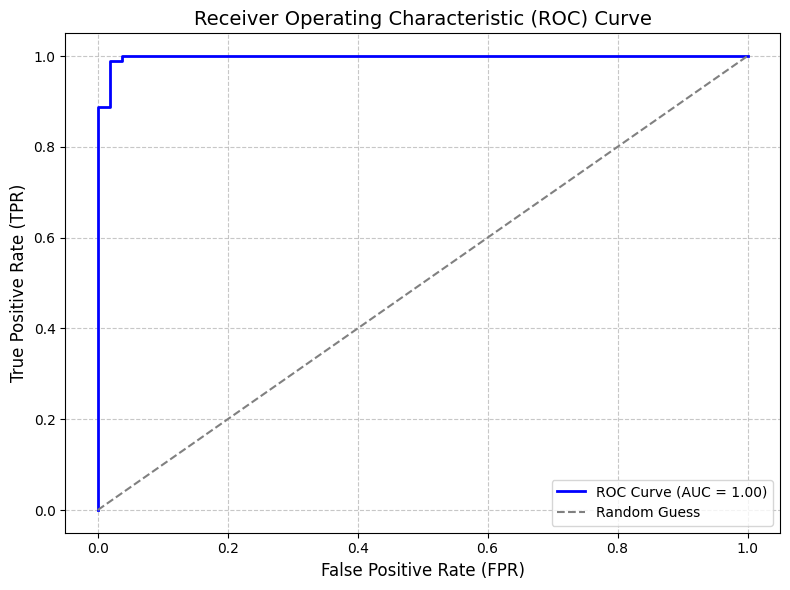

0.9977111943404079


In [24]:

# Generate ROC Curve

y_probs = log_reg.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#print auc score
print(auc_score)




### 2.3 Support Vector Machine (SVM)

In [25]:
#svm 


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_vlaues = [0.01, 0.1, 0.2, 1, 10, 100]

param_grid = {'kernel': kernels, 'C': C_vlaues}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

grid_search.best_params_


{'C': 0.2, 'kernel': 'linear'}

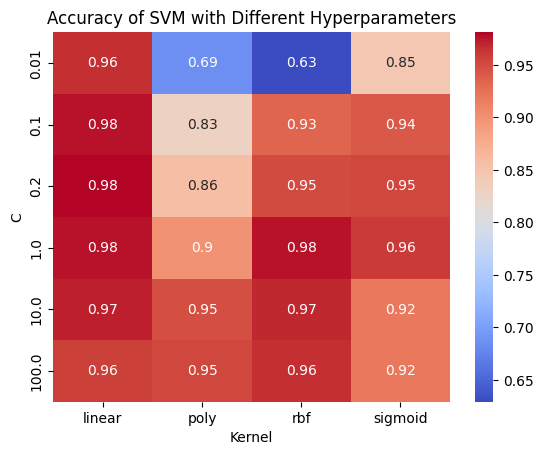

In [26]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.pivot(index='param_C', columns='param_kernel', values='mean_test_score')

sns.heatmap(results, annot=True, cmap='coolwarm')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Accuracy of SVM with Different Hyperparameters')
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



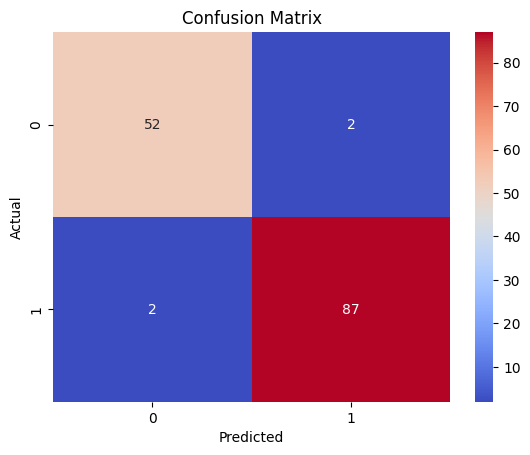

In [27]:

# Train with the best parameters
svc = SVC(kernel='linear', C=0.2)

svc.fit(X_train, y_train)

# Test on the test set
y_pred = svc.predict(X_test)

# Get full report
print(classification_report(y_test, y_pred))

# Confusion matrix plot

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


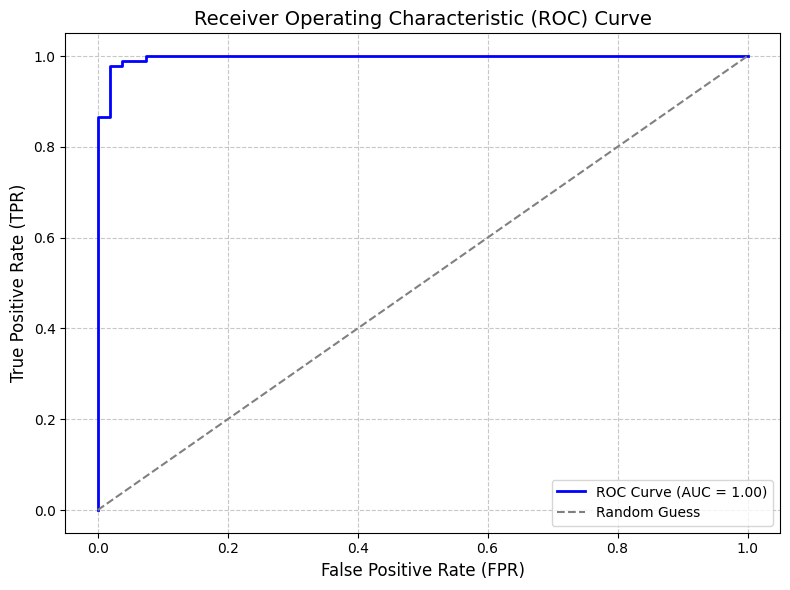

0.9966708281315023


In [28]:

# Generate ROC Curve

y_probs = svc.decision_function(X_test)  # Probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#print auc score
print(auc_score)

### 2.4 Ensemble Methods (Boosting and Bagging)

#### 2.4.1 Bagging

In [29]:
# Number of trees in random forest
n_estimators = [50, 80, 100,200, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum depth of a tree
max_depth = []
max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap
               }

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=6)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 1700}

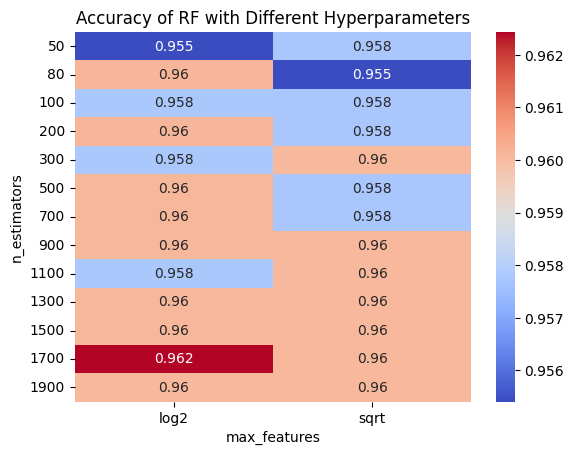

In [30]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.pivot(index='param_n_estimators', columns='param_max_features', values='mean_test_score')

sns.heatmap(results, annot=True, cmap='coolwarm', fmt ='.3g')
plt.xlabel('max_features')
plt.ylabel('n_estimators')
plt.title('Accuracy of RF with Different Hyperparameters')
plt.show()


In [31]:
# Number of trees in random forest
n_estimators = [50, 80, 100,200, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]
# Number of features to consider at every split
max_features = ['log2'] #, 'sqrt']
# log2 was better, I removed sqrt to have the be able to use pivot on the df (otherwise maxing n_estimators the index is not possible)
# Maximum depth of a tree
max_depth = [1, 5, 10, 30]
max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap
               }

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=6)

grid_search.fit(X_train, y_train)

grid_search.best_params_

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 80}

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



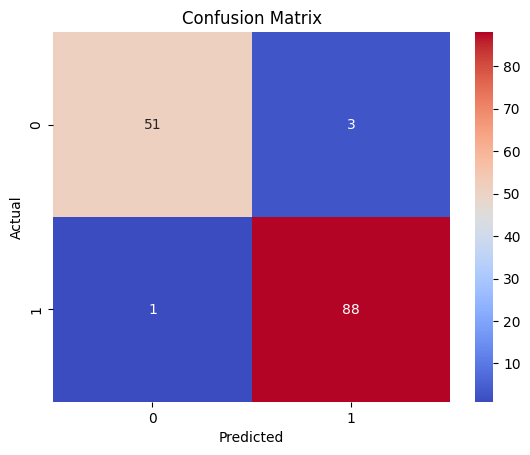

In [32]:
# Train with the best parameters
rf = RandomForestClassifier(n_estimators=80, max_depth=5, max_features='log2')
rf.fit(X_train, y_train)

# Test on the test set
y_pred = rf.predict(X_test)

# Get full report
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

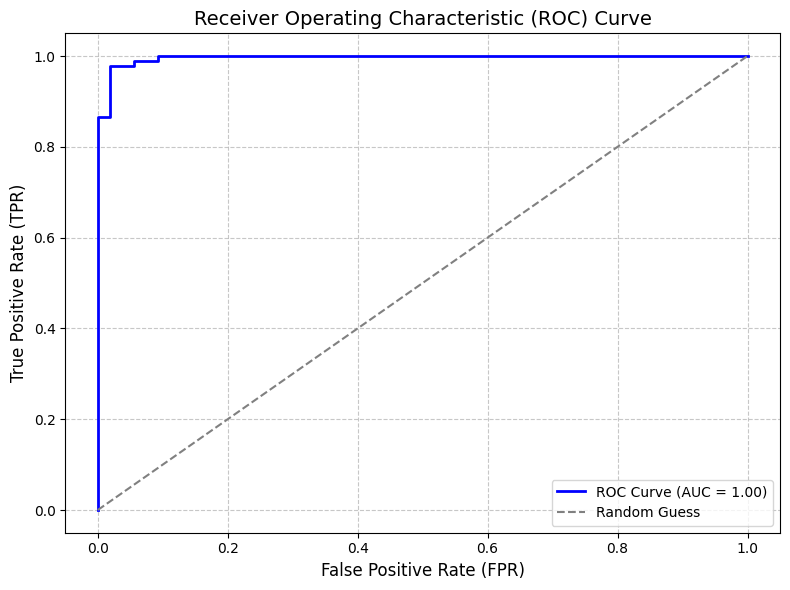

0.9962546816479402


In [33]:


y_probs = rf.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#print auc score
print(auc_score)



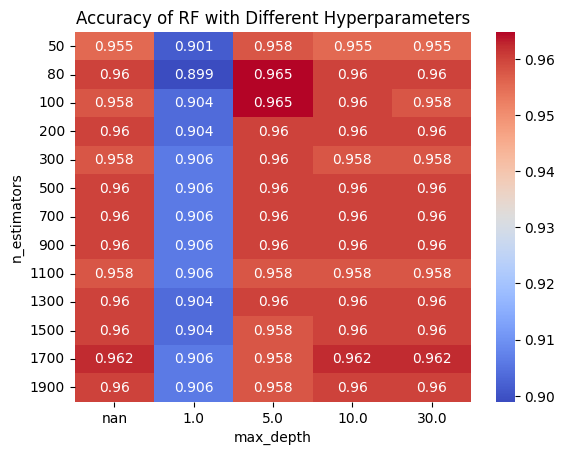

In [34]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')

sns.heatmap(results, annot=True, cmap='coolwarm', fmt='.3g')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Accuracy of RF with Different Hyperparameters')
plt.show()


#### 2.4.2 Boosting

In [35]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 1.4, 1.5, 1.6, 2, 3],  # Weight of each classifier

    'n_estimators' : [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900],
}

ada = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=6)

grid_search.fit(X_train, y_train)

grid_search.best_params_

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'learning_rate': 1.5, 'n_estimators': 1300}

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



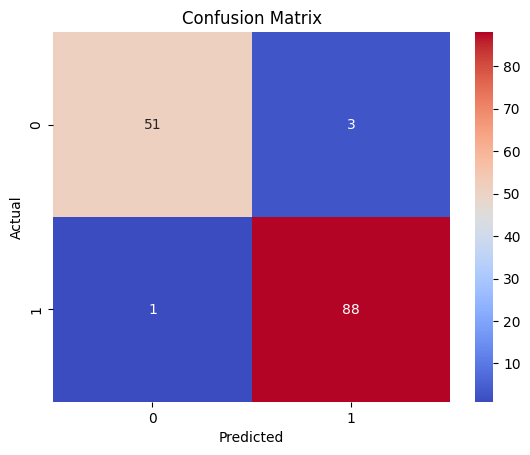

In [36]:
# Train with the best parameters
ada = AdaBoostClassifier(learning_rate =  1.5, n_estimators = 1300)
ada.fit(X_train, y_train)

# Test on the test set
y_pred = rf.predict(X_test)

# Get full report
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

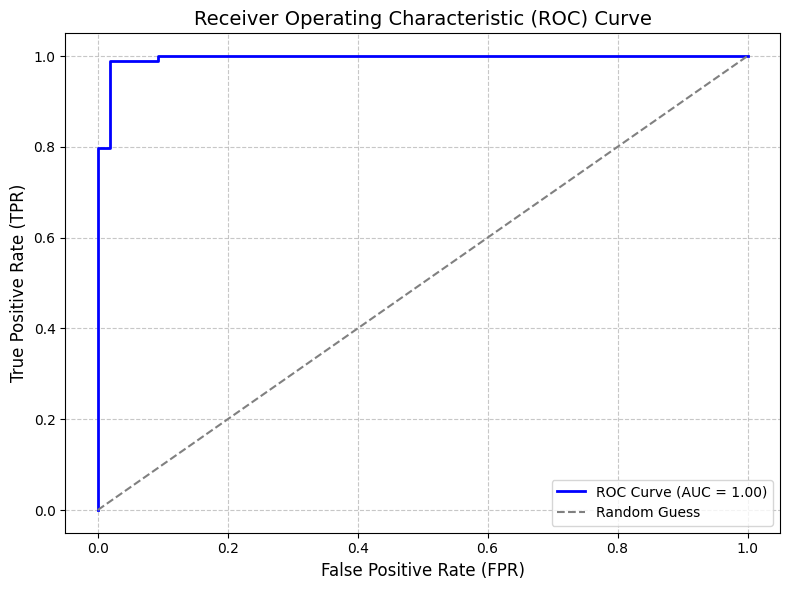

0.9954223886808157


In [37]:


y_probs = ada.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#print auc score
print(auc_score)



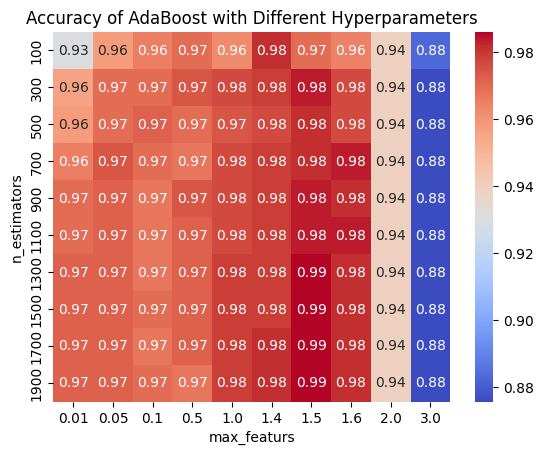

In [38]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')

sns.heatmap(results, annot=True, cmap='coolwarm',)
plt.xlabel('max_featurs')
plt.ylabel('n_estimators')
plt.title('Accuracy of AdaBoost with Different Hyperparameters')
plt.show()
